<a href="https://colab.research.google.com/github/Andyqballer/HomeWork6-Ml/blob/main/HomeWork6Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170M/170M [00:02<00:00, 62.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Training Single Layer Network...
Single Layer Epoch [10/100], Loss: 0.9966
Single Layer Epoch [20/100], Loss: 0.6798
Single Layer Epoch [30/100], Loss: 0.4948
Single Layer Epoch [40/100], Loss: 0.3647
Single Layer Epoch [50/100], Loss: 0.3178
Single Layer Epoch [60/100], Loss: 0.2672
Single Layer Epoch [70/100], Loss: 0.2280
Single Layer Epoch [80/100], Loss: 0.2097
Single Layer Epoch [90/100], Loss: 0.1844
Single Layer Epoch [100/100], Loss: 0.1916

Training Three Layer Network...
Three Layer Epoch [10/100], Loss: 1.2512
Three Layer Epoch [20/100], Loss: 1.0806
Three Layer Epoch [30/100], Loss: 0.9695
Three Layer Epoch [40/100], Loss: 0.9007
Three Layer Epoch [50/100], Loss: 0.8399
Three Layer Epoch [60/100], Loss: 0.7863
Three Layer Epoch [70/100], Loss: 0.7427
Three Layer Epoch [80/100], Loss: 0.7200
Three Layer Epoch [90/100], Loss: 0.6787
Three Layer Epoch [100/100], Loss: 0.6568

Results:

S

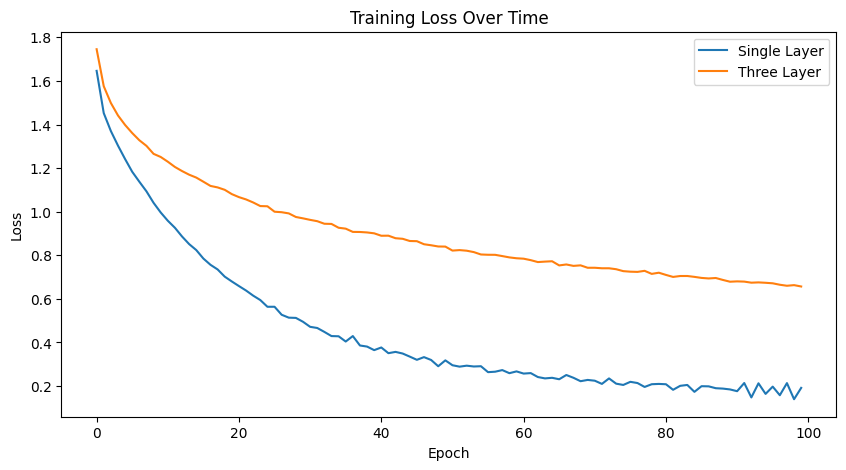

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 32 * 32 * 3  # CIFAR-10 images are 32x32x3
num_classes = 10
hidden_size = 256
num_epochs = 100
batch_size = 64
learning_rate = 0.001

# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Part A: Single Hidden Layer Network
class SingleLayerNet(nn.Module):
    def __init__(self):
        super(SingleLayerNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Part B: Three Hidden Layer Network
class ThreeLayerNet(nn.Module):
    def __init__(self):
        super(ThreeLayerNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

def train_model(model, model_name=""):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    total_step = len(train_loader)
    start_time = time.time()
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate average loss for the epoch
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)

        if (epoch + 1) % 10 == 0:
            print(f'{model_name} Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    training_time = time.time() - start_time

    # Evaluation
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total

    return training_time, train_losses, accuracy

def main():
    # Part A: Single Hidden Layer
    print("\nTraining Single Layer Network...")
    single_layer_model = SingleLayerNet().to(device)
    time_single, losses_single, acc_single = train_model(single_layer_model, "Single Layer")

    # Part B: Three Hidden Layers
    print("\nTraining Three Layer Network...")
    three_layer_model = ThreeLayerNet().to(device)
    time_three, losses_three, acc_three = train_model(three_layer_model, "Three Layer")

    # Print results
    print("\nResults:")
    print("\nSingle Layer Network:")
    print(f"Training Time: {time_single:.2f} seconds")
    print(f"Final Training Loss: {losses_single[-1]:.4f}")
    print(f"Evaluation Accuracy: {acc_single:.2f}%")

    print("\nThree Layer Network:")
    print(f"Training Time: {time_three:.2f} seconds")
    print(f"Final Training Loss: {losses_three[-1]:.4f}")
    print(f"Evaluation Accuracy: {acc_three:.2f}%")

    # Plot training losses
    plt.figure(figsize=(10, 5))
    plt.plot(losses_single, label='Single Layer')
    plt.plot(losses_three, label='Three Layer')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()